![](http://cdn.futura-sciences.com/sources/images/gaming.jpeg)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=13
matplotlib.rcParams['figure.figsize']=(36,20)
matplotlib.rcParams['figure.facecolor']='white'

import warnings
warnings.filterwarnings('ignore')

In [30]:
df=pd.read_csv(r'/kaggle/input/video-games-sales-dataset-2022-updated-extra-feat/Video_Games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(16719, 16)

- We have a 16719 rows equal to 16719 game title here and 16 columns.

# Video Game Sales 

Video game is always related to our childhood. We played game when we're small and even when we're already an adult. But is the industry doing well these day ? We can analyze the video game sale dataset with graphs visualization to get some insight about that.

The dataset is taken from https://www.kaggle.com/rishidamarla/video-game-sales

Libraries used in project : 
* [Pandas](https://pandas.pydata.org/) : a software library written for the Python programming language for data manipulation and analysis
* [Numpy](https://numpy.org/) : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
* [Matplotlib](https://matplotlib.org/) : a plotting library for the Python programming language and its numerical mathematics extension NumPy.
* [Seaborn](https://seaborn.pydata.org/) : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<div style="background-color:Navy; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Data Preparation & Data Cleaning </h1>
</div>

In [32]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


 From the above result we can see that : 
 - Not every game is rated and got critic score.
 - Year of sales & Platform doest not match the name index.
 
 We should try to remove non objects for a bteer dataframe.

In [34]:
#remove null value in Year of release column
df.drop(df[df.Year_of_Release.isnull()].index, inplace = True) 

#remove null value in Name column
df.drop(df[df.Name.isnull()].index, inplace = True) 

#remove null value in Publisher column
df.drop(df[df.Publisher.isnull()].index, inplace = True) 
df.info()

                   # or 
    
""" df = df.dropna(subset=['Year_of_Release','Name','Publisher'])
df.info() """

<class 'pandas.core.frame.DataFrame'>
Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Critic_Score     7982 non-null   float64
 11  Critic_Count     7982 non-null   float64
 12  User_Score       9837 non-null   object 
 13  User_Count       7461 non-null   float64
 14  Developer        9904 non-null   object 
 15  Rating           9767 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


" df = df.dropna(subset=['Year_of_Release','Name','Publisher'])\ndf.info() "

Ok Dataframe seems good enough. We should take a closer look at the description.

In [35]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,16416.000000,7982.000000,7982.000000,7461.000000
mean,2006.489888,0.264129,0.146034,0.078623,0.047670,0.536708,68.997119,26.440992,163.008846
std,5.881148,0.819028,0.507134,0.311348,0.188156,1.559885,13.918755,19.009305,563.932422
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


- We have around 16416 game title that was sold between 1980 and 2020.
- NA seems like the Biggest market to sell games.
- Sales are in million.

<div style="background-color:Navy; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Exploratory Data Analysis & Visualization</h1>
</div>

### Total Sales Each Year

First, We should see the total sales of games each year. It helps us to know when video games are declining and when they are popular

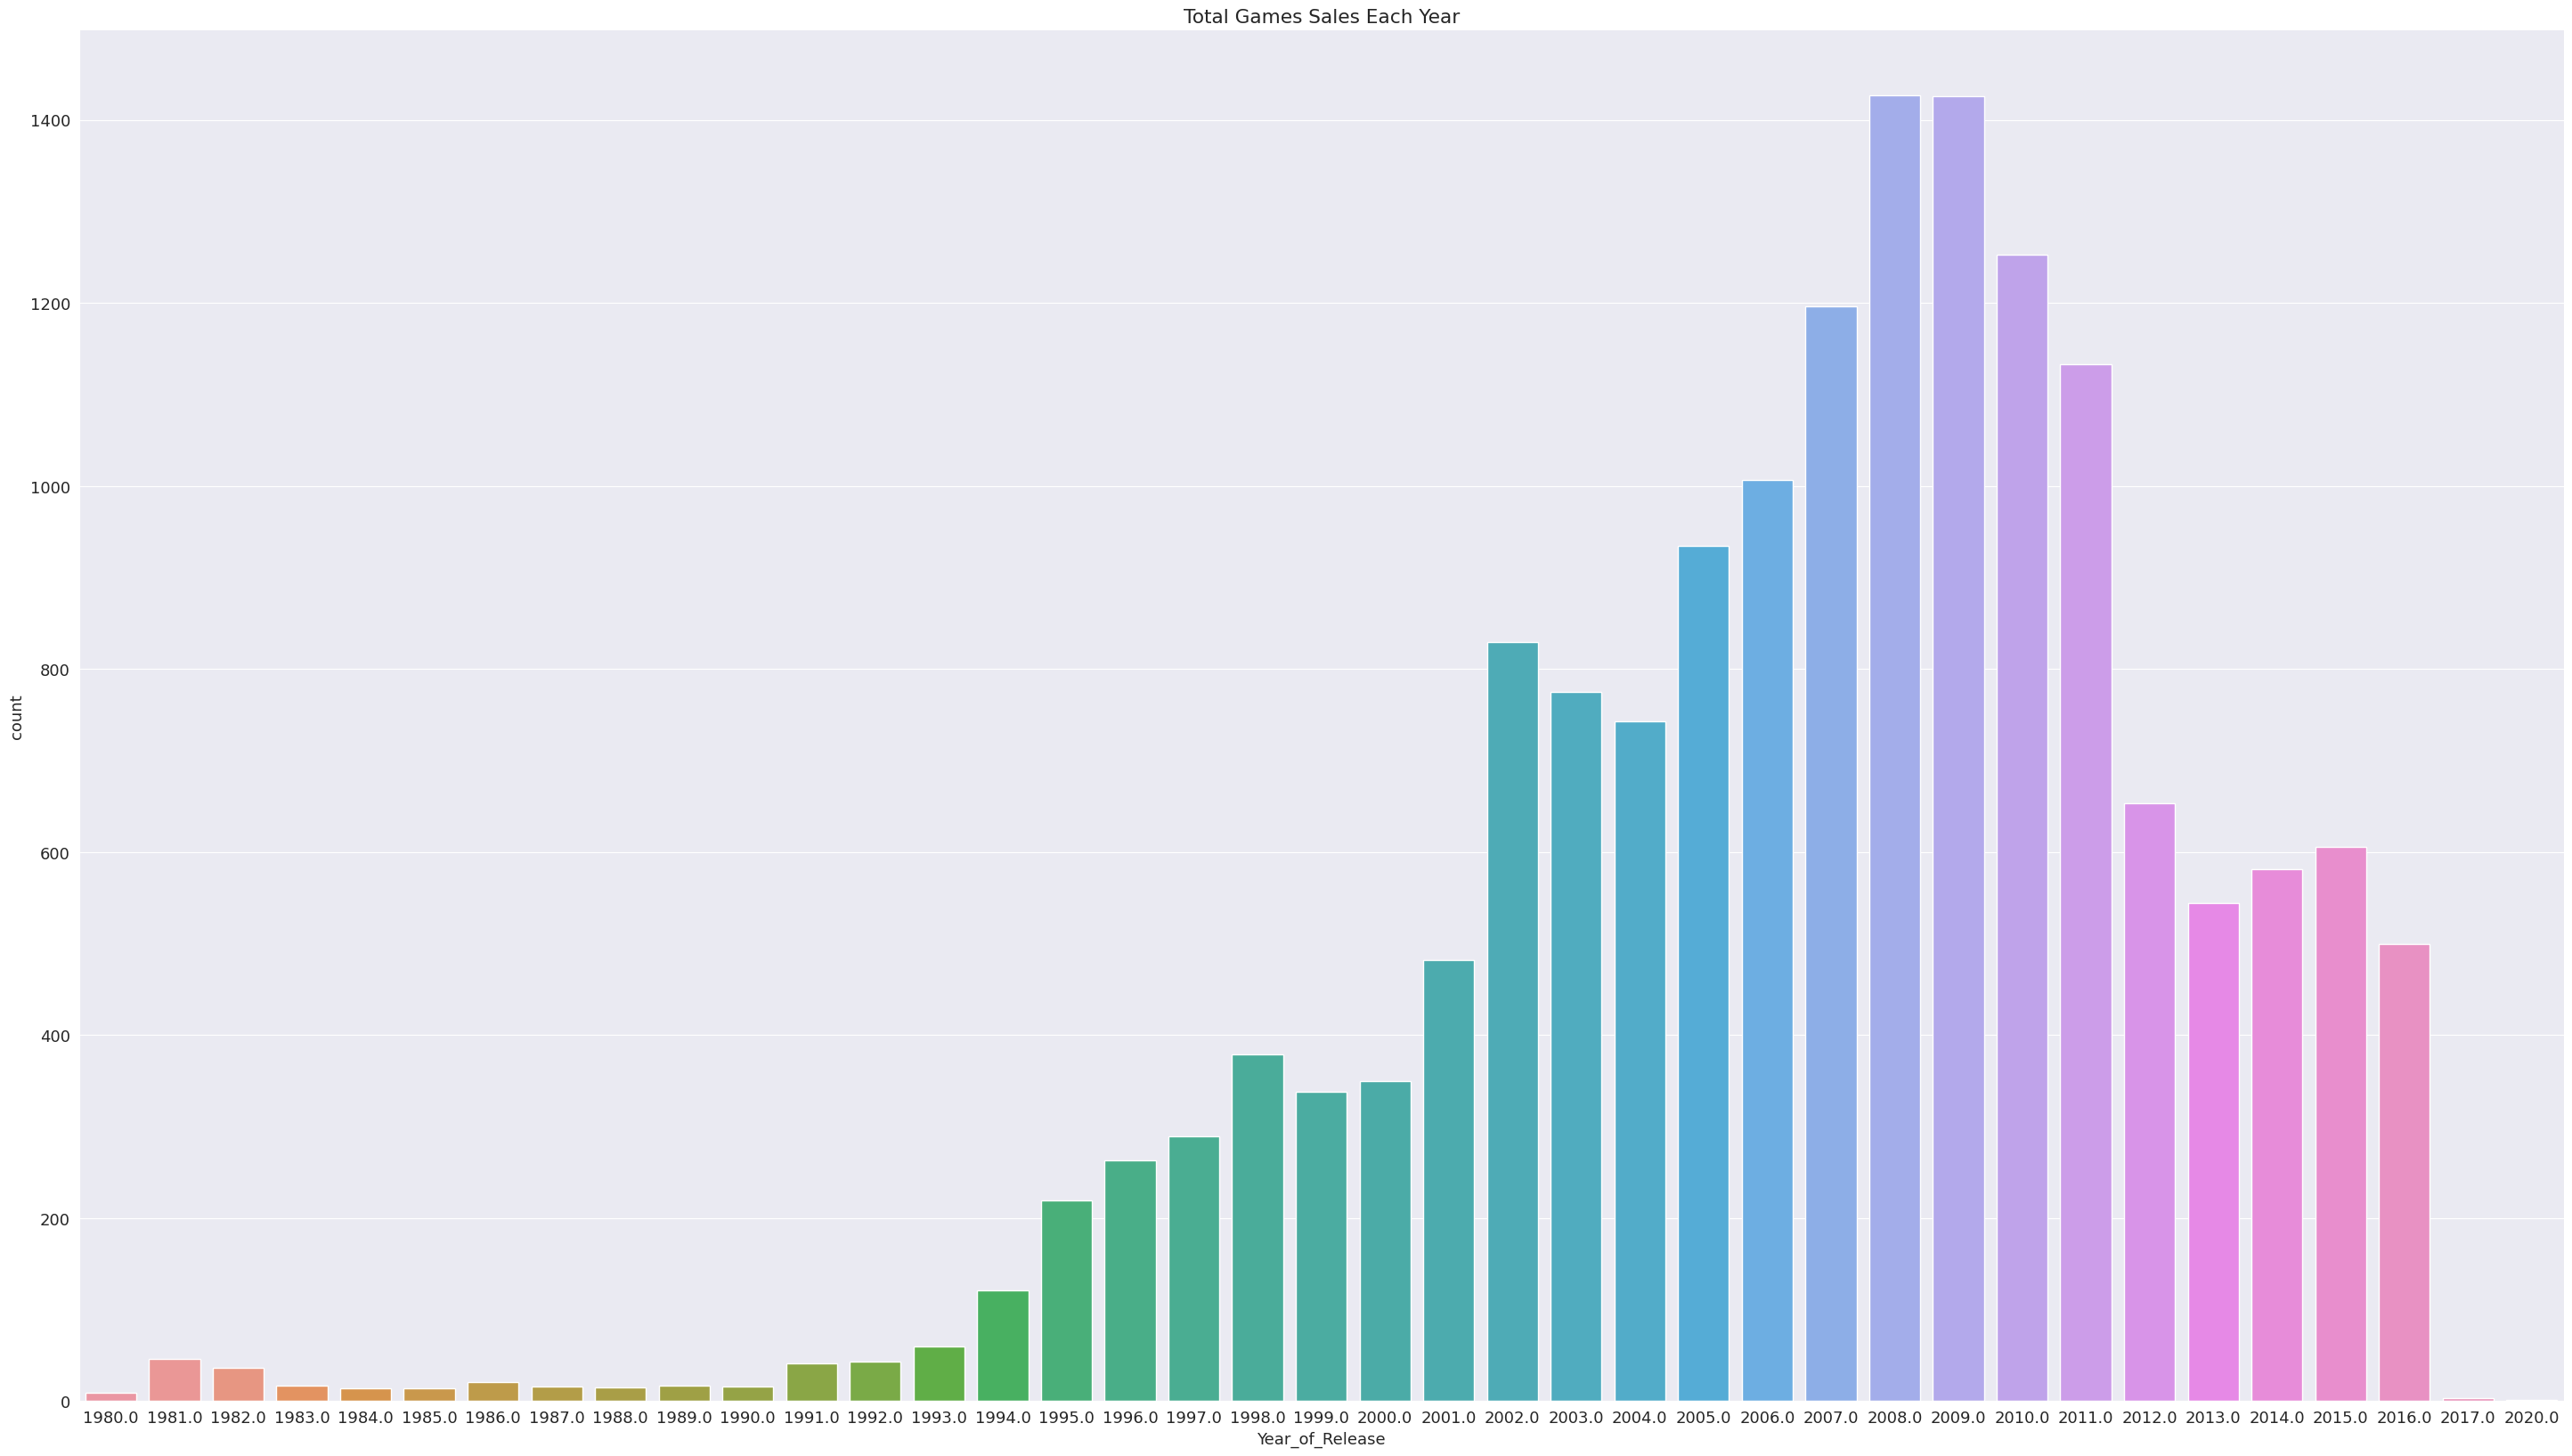

In [36]:
sns.countplot(x= df['Year_of_Release'])
plt.title('Total Games Sales Each Year')
plt.show()

Seems like we don't have much data from 2017 to 2020. let remove them and try using another graph for better view.

In [37]:
# Remove games that were released after 2016
df.drop(df[df['Year_of_Release']>2016].index, inplace=True)

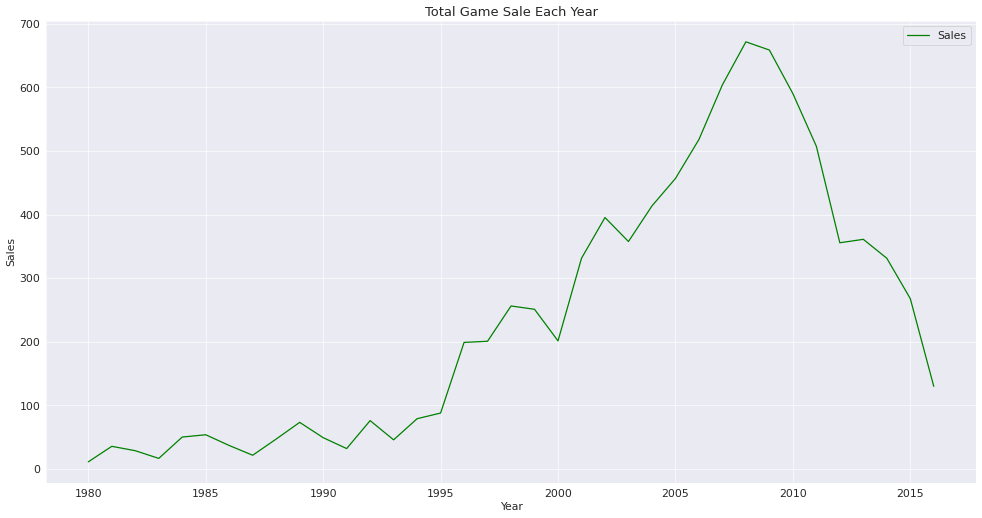

In [38]:
sales_df=df.groupby('Year_of_Release',as_index=False).sum()

x_axis=sales_df['Year_of_Release']
y_axis=sales_df['Global_Sales']

plt.figure(figsize=(20,10),dpi=60)
plt.plot(x_axis,y_axis,label='Sales',color='green')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Game Sale Each Year')
plt.legend()
plt.show()

### Total Sales Comparision Between Region Area

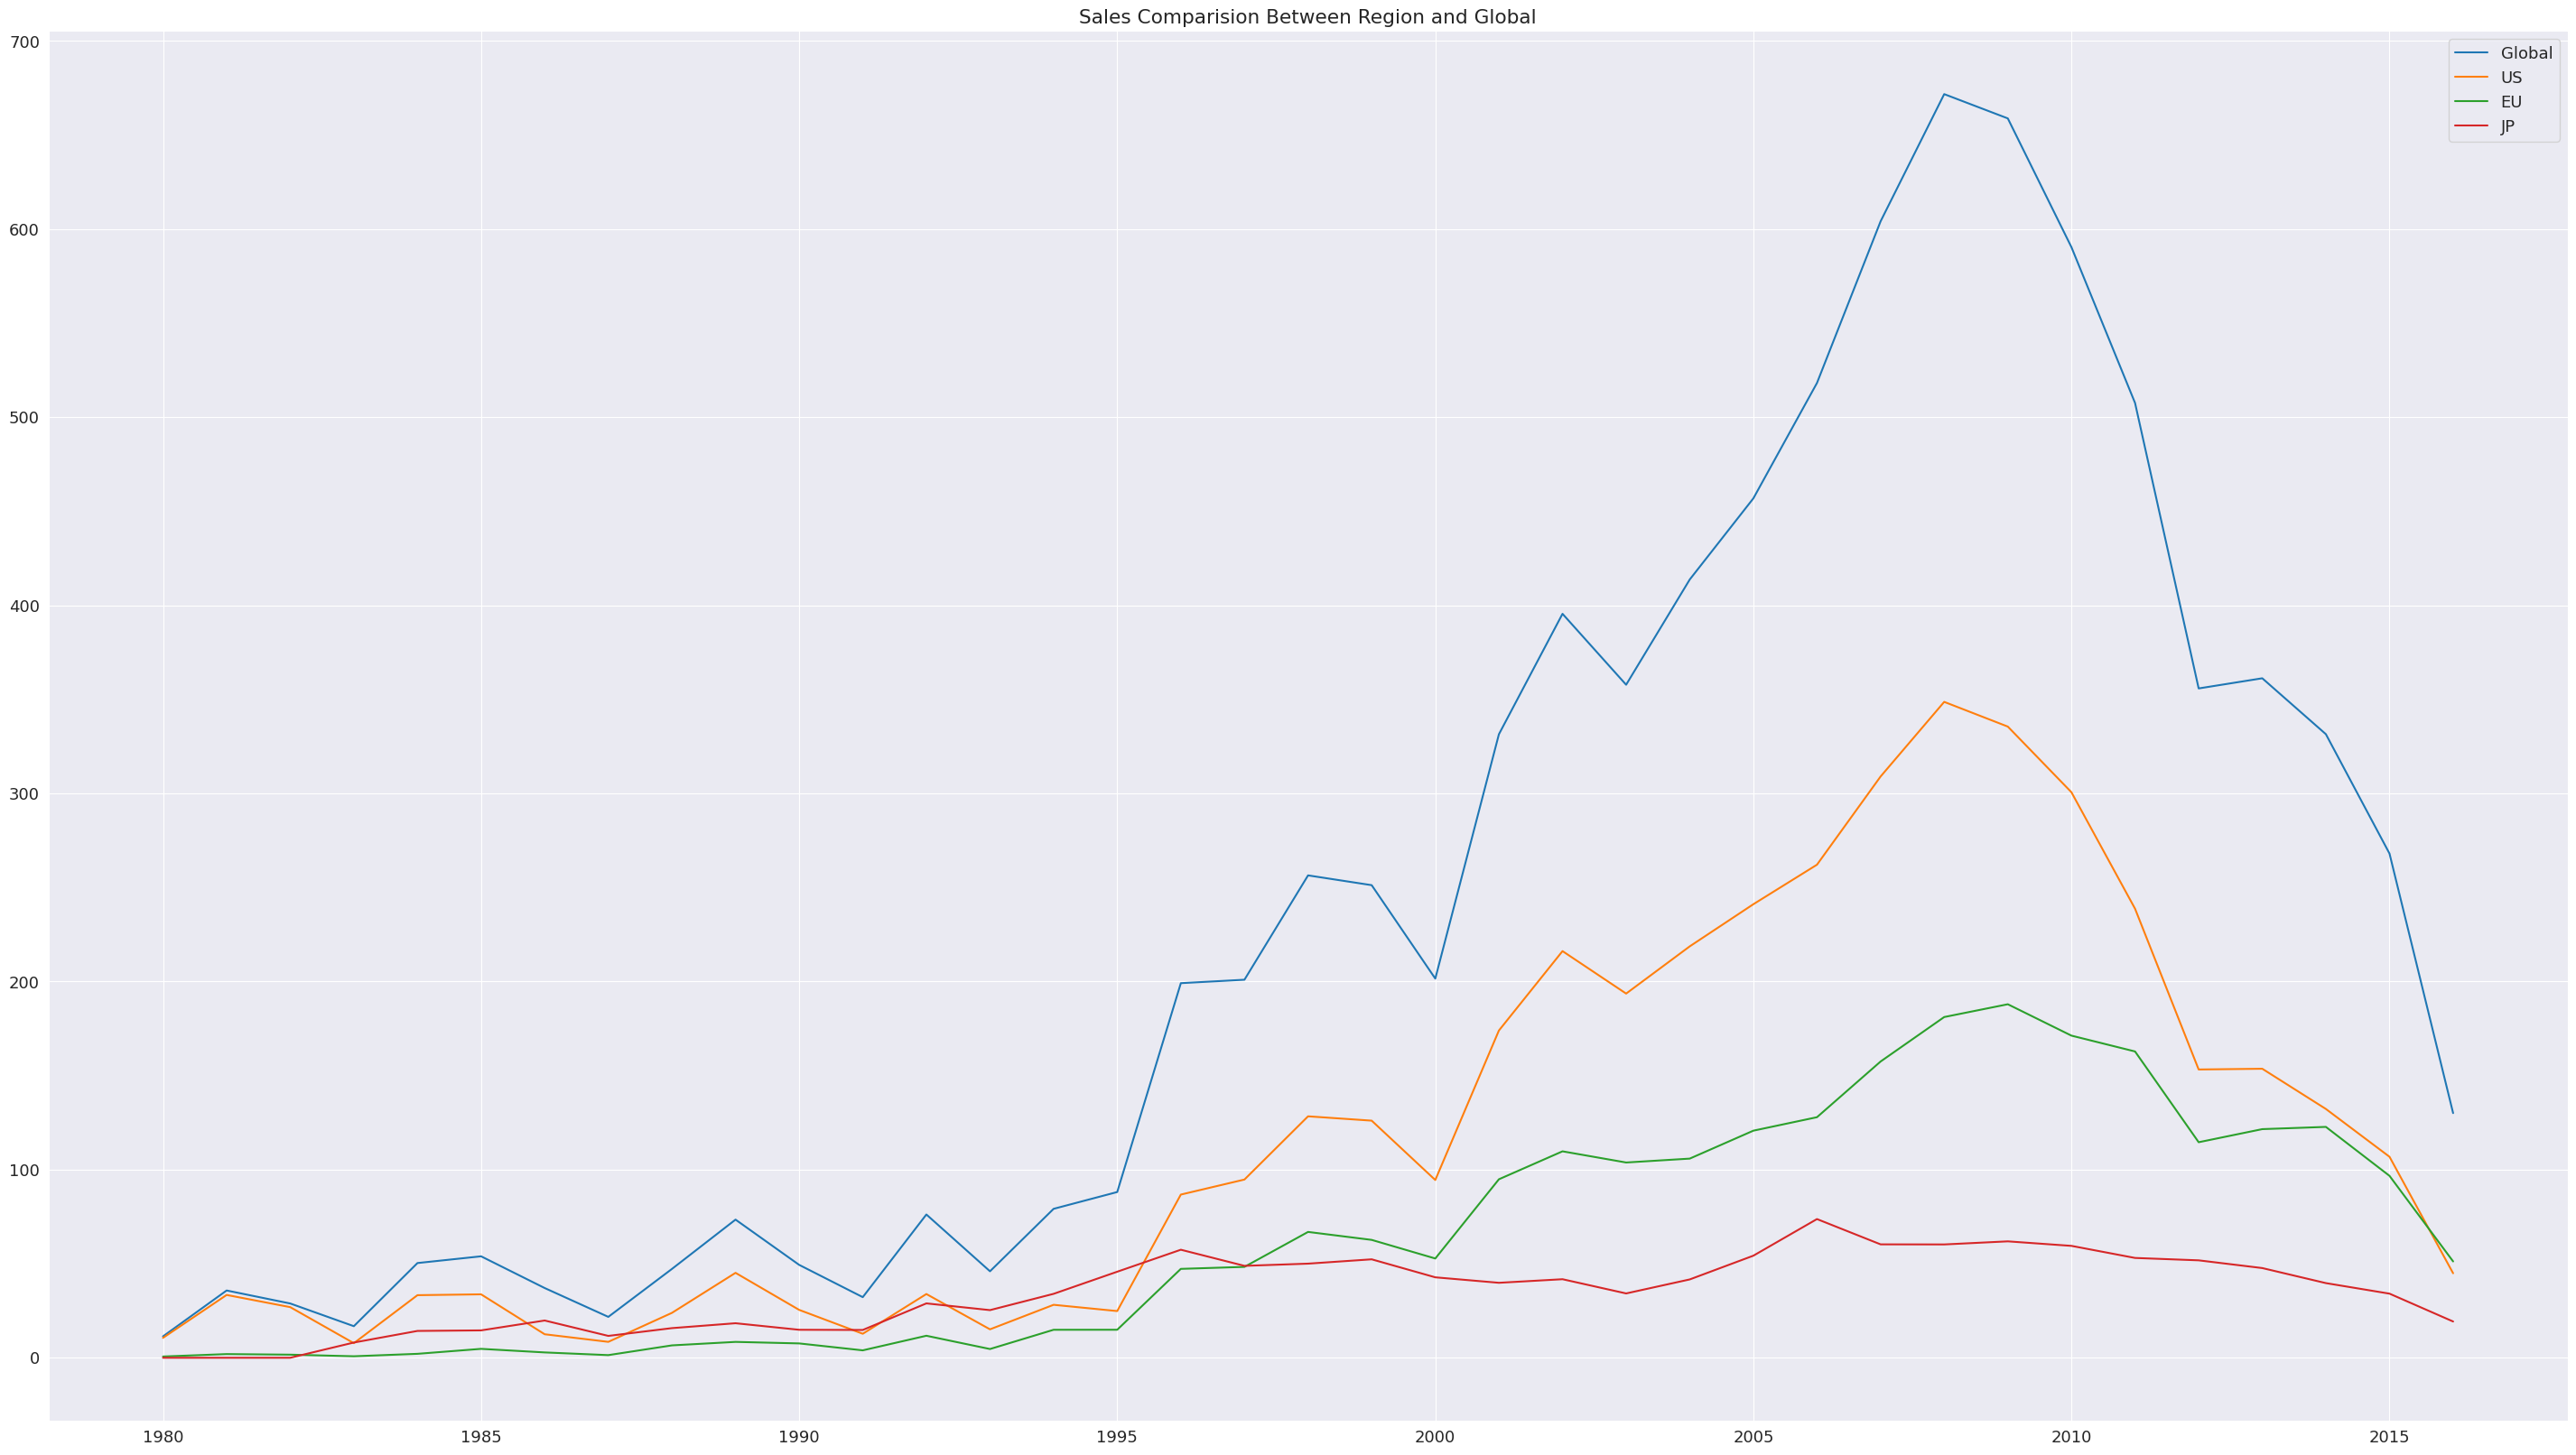

In [39]:
na=sales_df['NA_Sales']
eu=sales_df['EU_Sales']
jp=sales_df['JP_Sales']
total=sales_df['Global_Sales']


plt.plot(x_axis, total, label='Global')
plt.plot(x_axis, na, label='US')
plt.plot(x_axis, eu, label='EU')
plt.plot(x_axis, jp, label='JP')
plt.title('Sales Comparision Between Region and Global')
plt.legend(bbox_to_anchor=(1,1))

- We can see that the `US` is the largest market followed by the `EU` and `JP`. JP is pretty consistent and doesn't seem to be declined that much.
- In 2008 and 2009 video games were explored in popularity so we should take a look at the games list in these years.

## Top 10 Games and Platform in 2011 and 2012

In [40]:
top_2011_games=df.loc[df['Year_of_Release']==2011]
top_2011_games.sort_values('Global_Sales',ascending=False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
40,Mario Kart 7,3DS,2011.0,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
53,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,3.00,2.14,0.78,10.81,90.0,82.0,8.4,921.0,Nintendo,E
61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E10+


In [41]:
top_2012_games=df.loc[df['Year_of_Release']==2012]
top_2012_games.sort_values('Global_Sales',ascending=False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
62,New Super Mario Bros. 2,3DS,2012.0,Platform,Nintendo,3.66,3.14,2.47,0.63,9.90,78.0,70.0,7.2,424.0,Nintendo,E
66,Halo 4,X360,2012.0,Shooter,Microsoft Game Studios,6.65,2.28,0.04,0.74,9.71,87.0,87.0,7,3260.0,343 Industries,M
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.03,2.36,4.39,0.39,9.16,88.0,70.0,8.7,626.0,Nintendo,E


## Top 10 Platform Overall

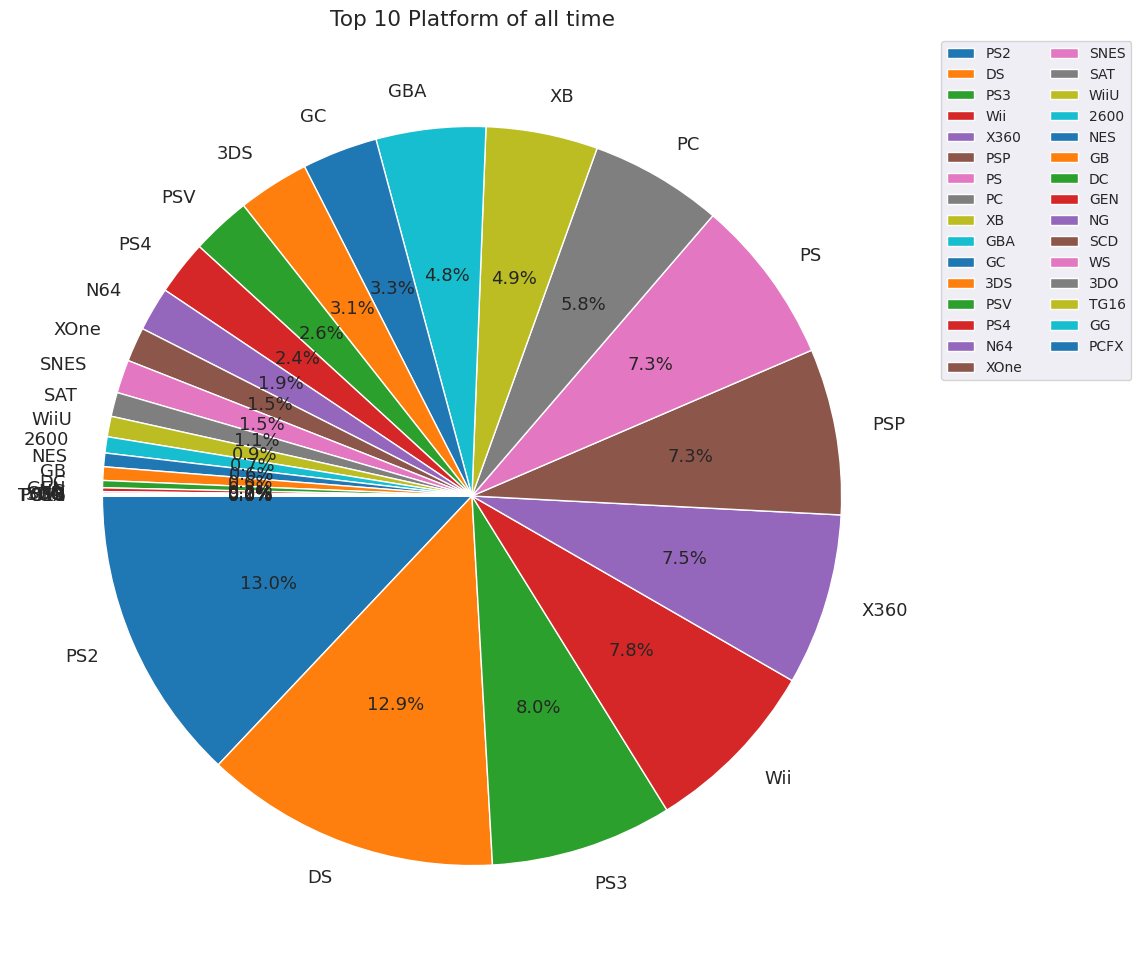

In [42]:
top10_platform=df['Platform'].value_counts()

plt.figure(figsize=(24,12))
plt.title('Top 10 Platform of all time')
plt.pie(top10_platform, labels=top10_platform.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.show()

PS2 still dominated for many years, truly the best selling console of all time.

## Top 10 Publishers

In [43]:
top10_publisher=df['Publisher'].value_counts().head(10)
top10_publisher

Publisher
Electronic Arts                 1344
Activision                       976
Namco Bandai Games               935
Ubisoft                          929
Konami Digital Entertainment     825
THQ                              712
Nintendo                         700
Sony Computer Entertainment      686
Sega                             629
Take-Two Interactive             421
Name: count, dtype: int64

<Axes: xlabel='Publisher', ylabel='count'>

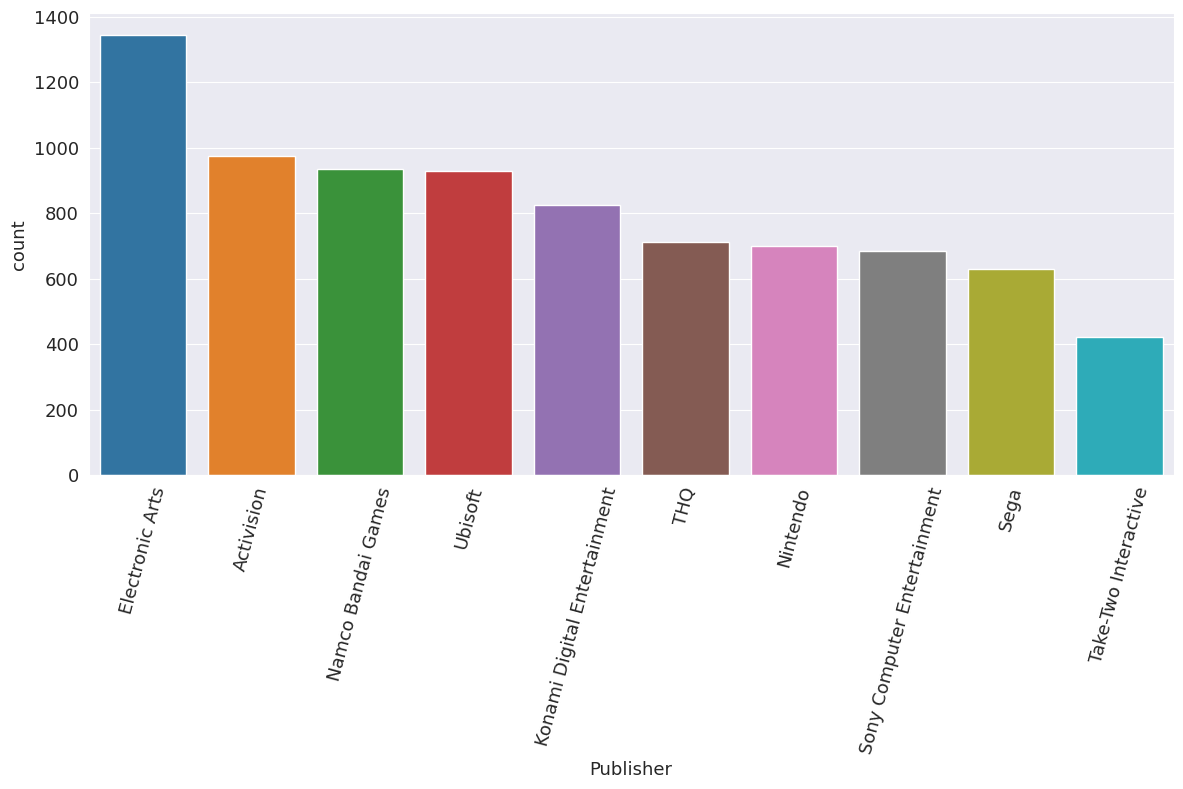

In [44]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=75)
sns.barplot(x=top10_publisher.index, y=top10_publisher)

## Top 10 Genre

In [45]:
top10_genre=df['Genre'].value_counts().head(10)
top10_genre

Genre
Action          3306
Sports          2306
Misc            1697
Role-Playing    1481
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       854
Fighting         837
Name: count, dtype: int64

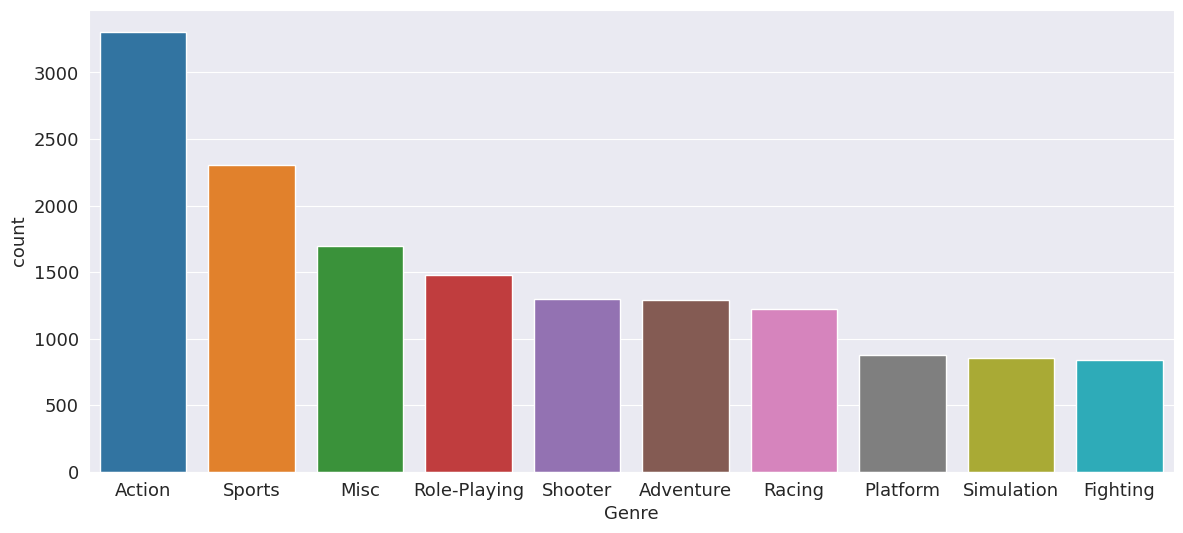

In [46]:
plt.figure(figsize=(14,6))
sns.barplot(x=top10_genre.index, y=top10_genre)
plt.show()

We should use pie chart for this kind of things. Since it can give you the percent of each genre as well.

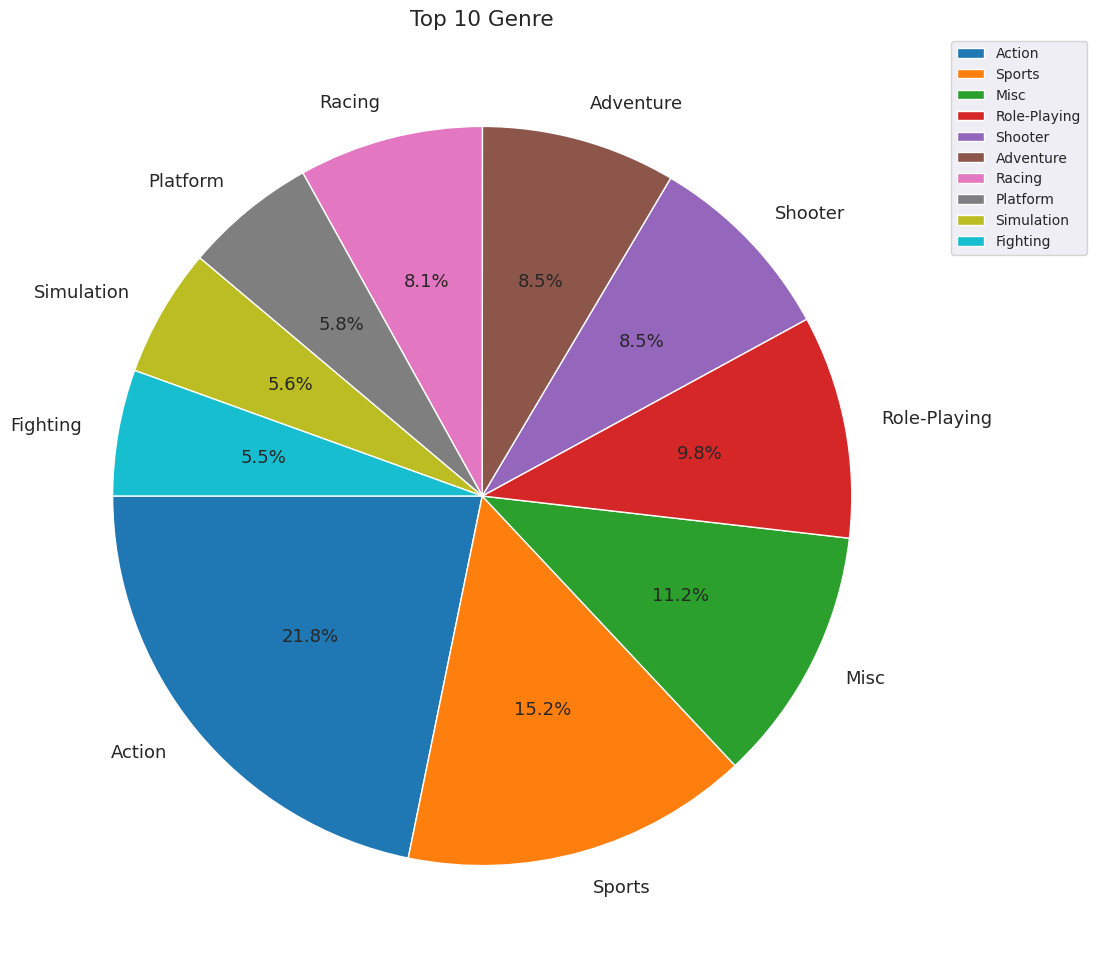

In [47]:
plt.figure(figsize=(24,12))
plt.title('Top 10 Genre')
plt.pie(top10_genre, labels=top10_genre.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2,fontsize=10, bbox_to_anchor=(1,1))
plt.show()

<div style="background-color:Navy; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Asking & Answering Questions </h1>
</div>

## Q1: How many games was sold in the US from 2000 to 2015 ? How does it Compare to Global sale ?

In [48]:
game_sales_2000_to_2015=df[(df['Year_of_Release']>=2000) & (df['Year_of_Release']<=2015)]  

total_sales_us=game_sales_2000_to_2015['NA_Sales'].sum()
total_sales_eu=game_sales_2000_to_2015['EU_Sales'].sum()
total_sales_jp=game_sales_2000_to_2015['JP_Sales'].sum()
total_sales_others=game_sales_2000_to_2015['Other_Sales'].sum()

data=[['US',total_sales_us],['JP',total_sales_jp],['EU',total_sales_eu],['others',total_sales_others]]
df_region=pd.DataFrame(data, columns=['Names','Sales'])
df_region

,Names,Sales
0,US,3478.93
1,JP,796.51
2,EU,2032.00
3,others,713.53


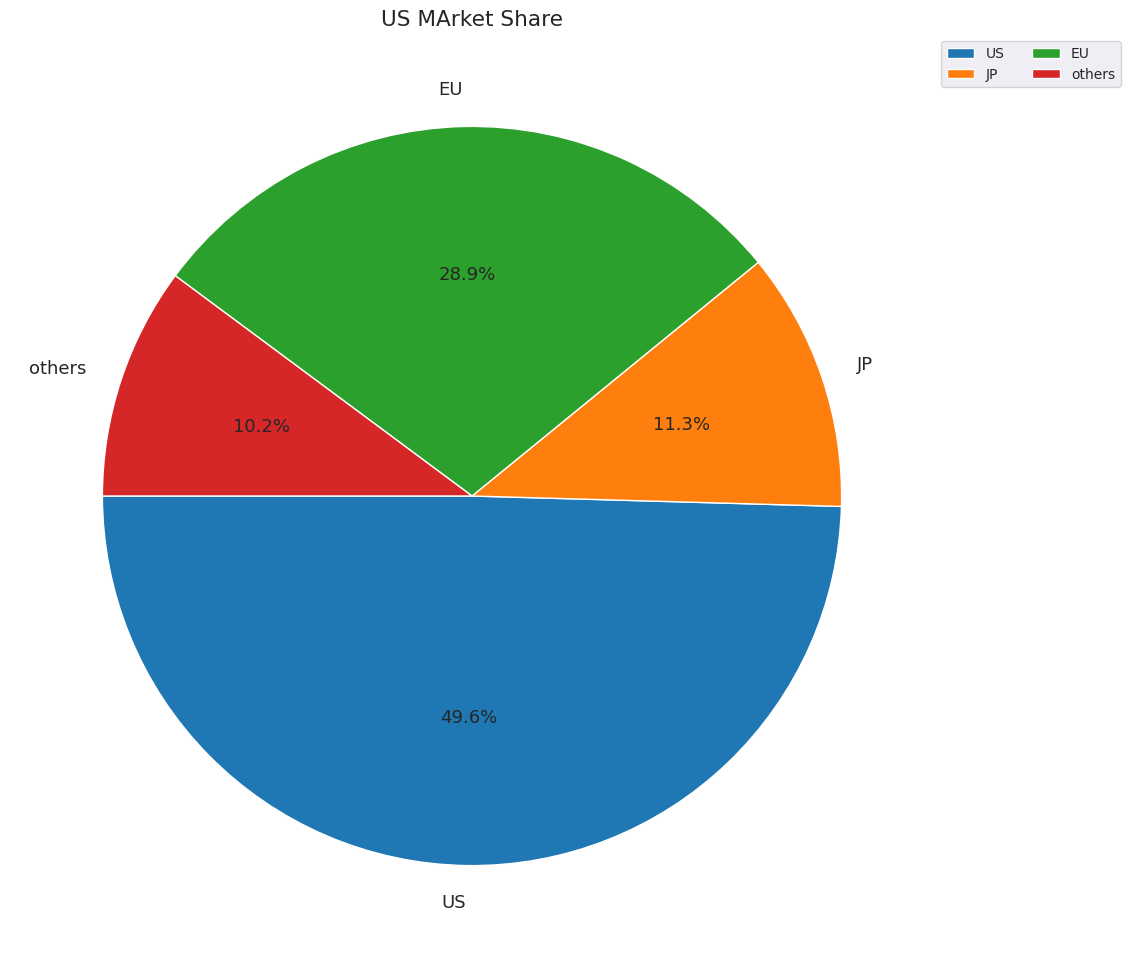

In [49]:
plt.figure(figsize=(24,12))
plt.title('US MArket Share')
plt.pie(df_region.Sales, labels=df_region.Names, autopct='%1.1f%%',startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)

## Q2: Assume We want to join the game industry and target US market. Which genre should we try to make ?

After taking a look at the top 10 genre chart we can see that Action is the most popular genre. But we should check out the top genre in the US first then compare it to other regions.

In [50]:
top_1000_us=df.sort_values('NA_Sales',ascending=False).head(1000)
top_1000_us

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Tom Clancy's Rainbow Six,PS,1999.0,Shooter,Red Storm Entertainment,0.93,0.63,0.00,0.08,1.64,NaN,NaN,NaN,NaN,NaN,NaN
1308,Mario Superstar Baseball,GC,2005.0,Sports,Nintendo,0.93,0.24,0.25,0.04,1.46,76.0,38.0,8.6,41.0,Namco,E
1246,Mega Man 2,NES,1988.0,Action,Capcom,0.93,0.15,0.42,0.01,1.51,NaN,NaN,NaN,NaN,NaN,NaN
1295,Tom Clancy's Ghost Recon: Future Soldier,X360,2012.0,Shooter,Ubisoft,0.93,0.40,0.02,0.12,1.47,79.0,75.0,7.2,334.0,Ubisoft Paris,M


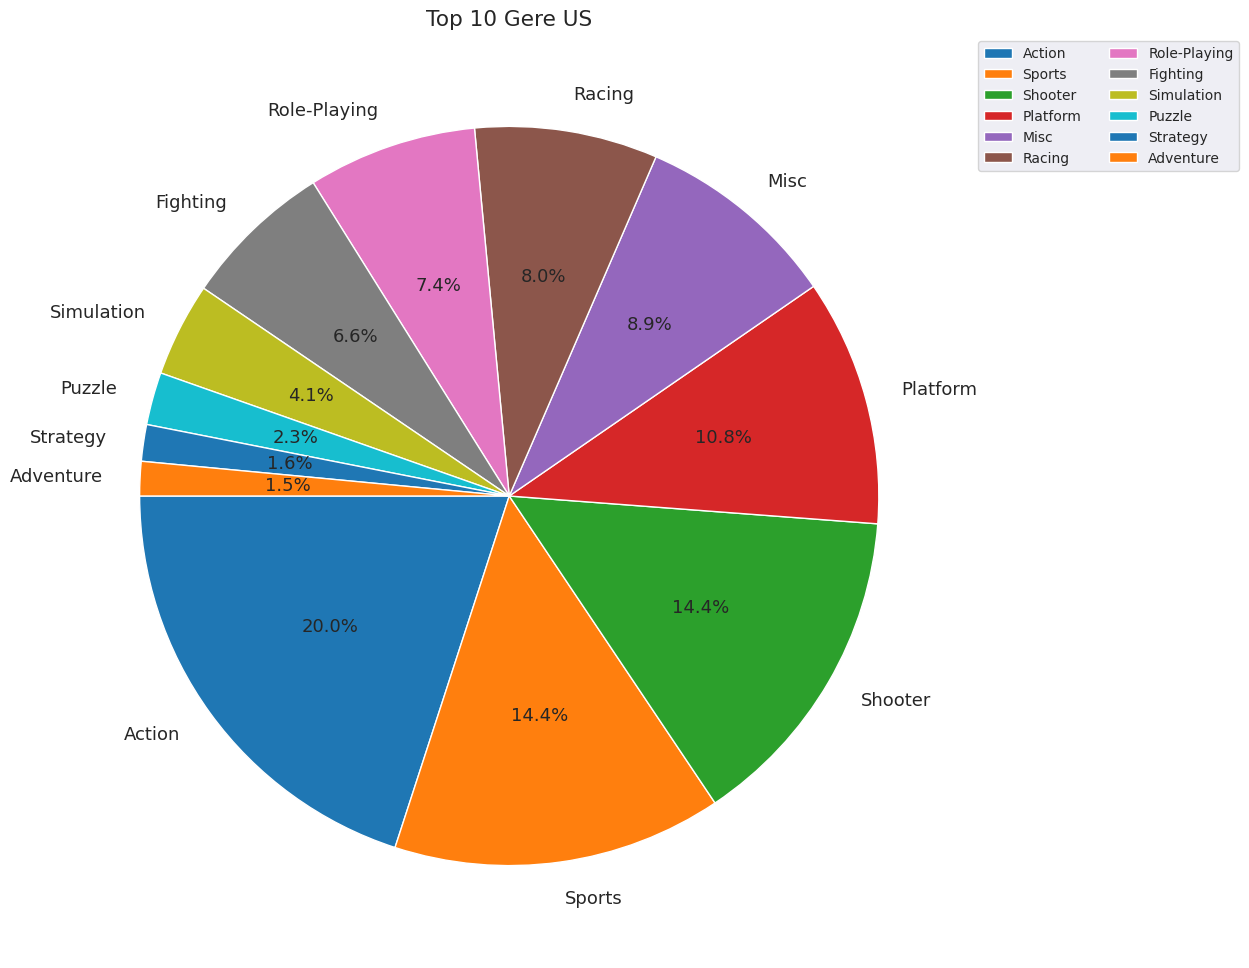

In [51]:
top_1000_us_genre=top_1000_us['Genre'].value_counts()

plt.figure(figsize=(24,12))
plt.title('Top 10 Gere US')
plt.pie(top_1000_us_genre, labels=top_1000_us_genre.index, autopct='%1.1f%%', startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.show()

Looking at the chart we can safely assume that `Action` and `Shooter`are really popular in the US. So for a better chances of sucess if we want to make games we should create a games combined between Action and shooter like Call of Duty, Valorant or GTA !

## Q3: Who is the top Publisher in Japan ? what game is the best seller and did they focus in some specific genre or Just publish whatever they think will be popular ? 

Firstly, We should find out who is the current top publisher in japan. Then we can conclude the genre percent of their published games and create a chart. Looking at the chart can give us a better view for the answer.

In [52]:
top_publisher=df.groupby('Publisher').sum()
top_publisher_jp=top_publisher.sort_values('JP_Sales',ascending=False).head(10)
top_publisher_jp

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Publisher,,,,,,,,,,,,,,,
Nintendo,Wii SportsSuper Mario Bros.Mario Kart WiiWii S...,WiiNESWiiWiiGBGBDSWiiWiiNESDSDSGBWiiWiiSNESDSD...,1402730.0,SportsPlatformRacingSportsRole-PlayingPuzzlePl...,815.86,418.58,457.74,94.55,1786.72,23327.0,12974.0,88.388.56.68.48.67.77.47.97.18.98.28.78.98.47....,58061.0,NintendoNintendoNintendoNintendoNintendoNinten...,EEEEEEEEEEETEEEEEEEEEEETETEEEEE10+EEEEETEEEE10...
Namco Bandai Games,Namco MuseumTekken Tag TournamentNamco Museum:...,GBAPS2PS2PS4PS2PS2NESPS3NESPSPS2PS3PS2PS3PS2PS...,1877786.0,MiscFightingMiscRole-PlayingFightingFightingSp...,69.76,42.14,127.62,14.55,254.19,18421.0,7458.0,7.38.5tbd9.28.68.37.49.28.88.768.98.78.58.87.8...,56891.0,Mass MediaNamcoDigital EclipseCD Projekt Red S...,ETE10+MTTTTMEMTEME10+EE10+TEMTTETTTTTTTE10+TTM...
Konami Digital Entertainment,Metal Gear Solid 2: Sons of LibertyMetal Gear ...,PS2PSPS3PS2PS2PS2PS2PS2PS4PS2PS2WiiPS2PS3PS2PS...,1654446.0,ActionActionActionSportsActionSportsSportsSpor...,88.67,67.93,91.03,29.54,277.36,22082.0,7101.0,8.79.48.78.99.38.29.17.98.29.195.46.86.7tbd6.6...,32389.0,KCEJKCEJKojima ProductionsKonamiKCEJKonamiKCET...,MMMEMEEEMEEEEEE10+EEE10+TEE10+MEE10+EEMMTMEEME...
Sony Computer Entertainment,Gran Turismo 3: A-SpecGran Turismo 4Gran Turis...,PS2PS2PSPS3PSPSPS2PSPSPSPSPS3PS3PS2PS3PSPS4PS3...,1375104.0,RacingRacingRacingRacingRole-PlayingRacingRole...,266.17,186.40,74.15,79.62,606.27,25827.0,12980.0,8.48.58.77.59.298.79.18.98.38.88.86.88.97.98.1...,88341.0,Polyphony DigitalPolyphony DigitalPolyphony Di...,EEEETTTTETTEETTTMETMME10+EEMTE10+EMEMEEEMMMMTE...
Capcom,Street Fighter II: The World WarriorMonster Hu...,SNESPSPPS3PSPPS3SNESPS2X3603DS3DSPS3PS2X360PSP...,764373.0,FightingRole-PlayingActionRole-PlayingFighting...,78.11,38.46,67.73,14.51,199.08,15187.0,7051.0,8.77.57.38.97.55.48.57.38.78.4997.66.658.39.48...,28872.0,CapcomCapcomCapcomCapcomCapcomCapcomCapcomCapc...,TMTMMMMTTMMMMMMMMMMMMMMMTTTTMMTTTTMTMMMMTETMTT...
Sega,Mario & Sonic at the Olympic GamesSonic the He...,WiiGENDSWiiGENWiiDSDSPS2PS2X360WiiPS2GENGCDCPS...,1261365.0,SportsPlatformSportsSportsPlatformSportsSports...,107.99,80.08,56.17,23.59,268.06,22051.0,9481.0,8.57.88.66.86.68.28.38.68.15.77.37.588.38.59.1...,34116.0,"Dimps Corporation, Sonic TeamSonic TeamSonic T...",EEEE10+EEEE10+EEE10+ETEEEEEEEEE10+EETEEEMTE10+...
Square Enix,Final Fantasy XIIFinal Fantasy XIIIDragon Ques...,PS2PS3PS2PS2PSPPS3PS3PSPX360PS3DSPSPDSX360PS4G...,466439.0,Role-PlayingRole-PlayingRole-PlayingRole-Playi...,48.23,32.16,50.00,13.59,143.91,10168.0,5520.0,7.67.38.8986.686.37.57.18.67.86.57.97.487.17.9...,34986.0,Square EnixSquare EnixLevel 5Square EnixSquare...,TTTE10+TTTTME10+E10+E10+MEE10+MME10+ME10+E10+T...
SquareSoft,Final Fantasy VIIIFinal Fantasy IXFinal Fantas...,PSPSSNESSNESPSSNESGBAPSPSSNESPSNESPSSNESPSSNES...,103818.0,Role-PlayingRole-PlayingRole-PlayingRole-Playi...,11.06,4.95,40.13,1.54,57.65,773.0,176.0,8.68.98.27.88.98.18.48.59,2509.0,SquareSoftSquareSoftSquareSoftSquare EnixSquar...,TTTEMTTEM
Enix Corporation,Dragon Quest VII: Warriors of EdenDragon Warri...,PSNESSNESNESSNESNESPS2GBSNESPSSNESGBPSGBGBAPSP...,59928.0,Role-PlayingRole-PlayingRole-PlayingRole-Playi...,0.76,0.31,32.40,0.27,33.74,294.0,53.0,8.86.58.98.2,100.0,Tri-AceGame ArtsMetroSandlot,TTET


So, the top publisher in Japan is `Ninetendo` with 457 million sales. Next let see what is their best seller.

In [53]:
top_games_nintendo=df.loc[df['Publisher']=='Nintendo'].sort_values('JP_Sales',ascending=False).head(10)
top_games_nintendo

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,NaN,NaN,NaN,NaN,NaN,NaN
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.38,4.46,6.04,1.36,18.25,NaN,NaN,NaN,NaN,NaN,NaN
27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.51,3.17,5.65,0.80,15.14,NaN,NaN,NaN,NaN,NaN,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,NaN,NaN,NaN,NaN,NaN,NaN
43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,86.0,57.0,8.7,242.0,Nintendo,E
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,77.0,37.0,7.1,19.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


The best seller game of Nintendo in Jpan is `Pokemon Red/ Pokemon Blue` which sold 10.22 million copy.

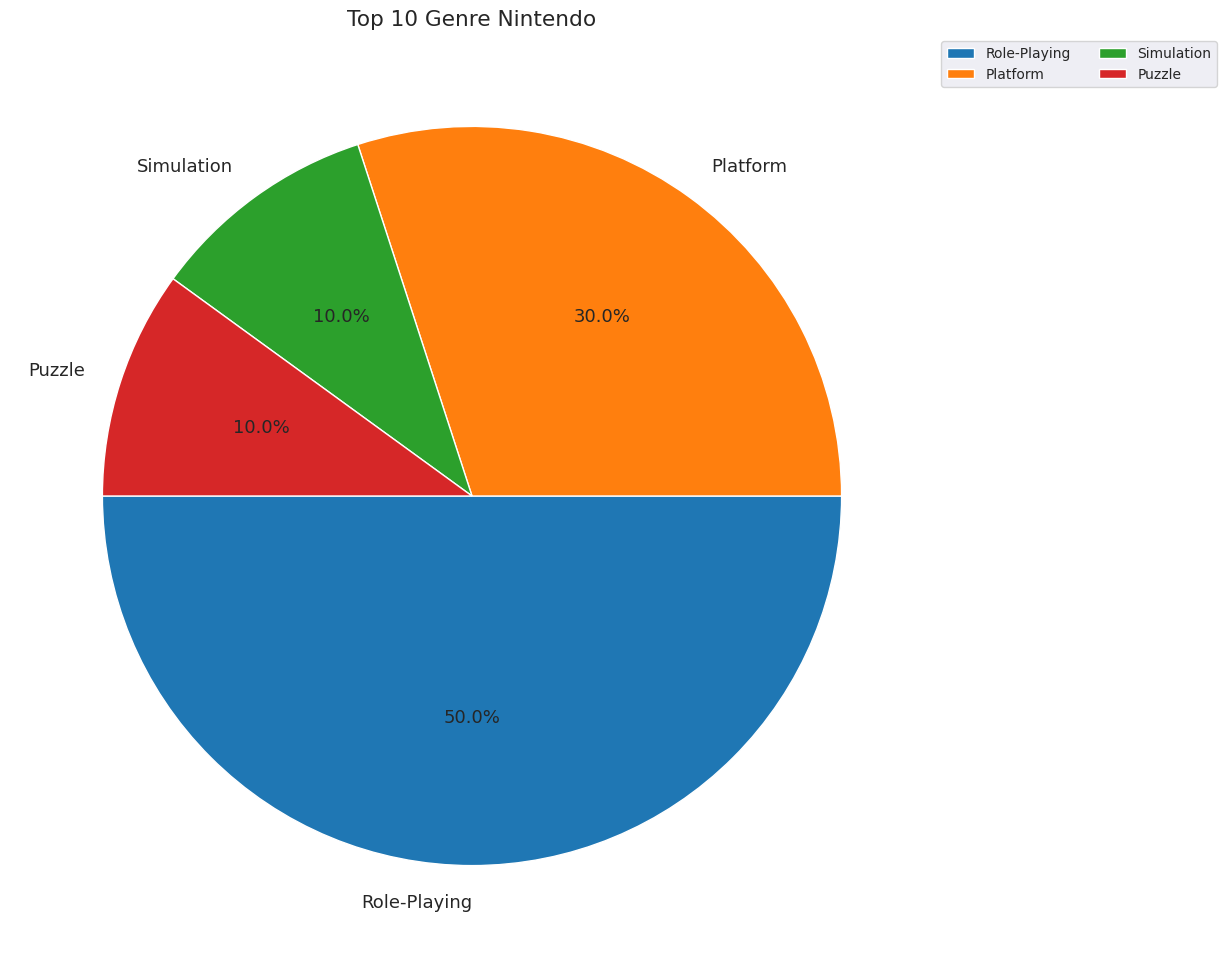

In [54]:
top_genre_nintendo=top_games_nintendo['Genre'].value_counts()

plt.figure(figsize=(24,12))
plt.title('Top 10 Genre Nintendo')
plt.pie(top_genre_nintendo, labels=top_genre_nintendo.index, autopct='%1.1f%%',startangle=180)
plt.legend(loc=2, fontsize=10, bbox_to_anchor=(1,1),ncol=2)
plt.show()

## Q4: Find the Top 10 games with the highest sales across North America, Europe, and Japan.

In [55]:
import plotly.graph_objects as go
import plotly.express as px

# Find the top 10 games with the highest sales across North America, Europe, and Japan
# Calculate total sales across North America, Europe, and Japan
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales']
top_10_highest_sales_games = df.nlargest(10, 'Total_Sales')

# Extract the platform and game names for these top 10 games
top_10_platforms = top_10_highest_sales_games['Platform'].tolist()
top_10_games = top_10_highest_sales_games['Name'].tolist()

# Create a comparison plot by region
fig = go.Figure()

# Add traces for each region
fig.add_trace(go.Bar(
    x=top_10_games,
    y=top_10_highest_sales_games['NA_Sales'],
    name='North America Sales',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=top_10_games,
    y=top_10_highest_sales_games['EU_Sales'],
    name='Europe Sales',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=top_10_games,
    y=top_10_highest_sales_games['JP_Sales'],
    name='Japan Sales',
    marker_color='red'
))

# Update layout
fig.update_layout(
    title='Top 10 Highest Sales Games Comparison by Region',
    xaxis_title='Game',
    yaxis_title='Sales (in millions)',
    barmode='group',
    height=600
)

fig.show()

Nintendo games are overall dominant regarding Sales over the Years in all Regions: North America, Europe and Japan

In [56]:
# Group by Genre and calculate total sales for each region
sales_by_genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum().reset_index()

# Plot sales by region with respect to genre
fig_genre_region = px.bar(sales_by_genre_region, x='Genre', y=['NA_Sales', 'EU_Sales', 'JP_Sales'],
                          title='Sales by Region with Respect to Genre',
                          labels={'value': 'Sales (in millions)', 'variable': 'Region'},
                          barmode='group',
                          height=400)

# Show the plot
fig_genre_region.show()

<div style="background-color:Navy; padding:20px; border-radius:5px;">
    <h1 style="color:white; font-weight:bold; text-align:center;">Conclusion </h1>
</div>

----

Summary/Conclusion:

- The dataset contains information on 16,416 video games, including their name, platform, year of release, genre, publisher, sales data for different regions, critic scores, user scores, and other attributes.

- Data preparation and cleaning were performed to handle missing values in columns like 'Year_of_Release', 'Name', and 'Publisher' by removing rows with null values. Exploratory analysis and visualization were carried out to gain insights into the video game sales trends.

- The total sales of video games were analyzed over the years, and it was observed that the US market has the highest sales, followed by the EU and JP markets.

- Action, Shooter and Sports were found to be the most popular genres in the US and Europe, indicating a good opportunity for game development in these genres for the US and Europen market. Japan on the other hand was found to be on Role-Playing and Platform genres.

- Nintendo was identified as the top publisher in Japan, with their best-selling game being "Pokemon Red/Pokemon Blue" with 10.22 million copies sold. Nintendo's focus was found to be on Role-Playing and Platform genres.


Future Enhancements:

- The analysis could be further expanded to include the impact of critic scores and user scores on game sales, and how they vary across different genres.

- The dataset could be enriched with additional attributes like game development budgets, marketing budgets, and advertising strategies to understand their impact on game sales.

- Comparing the success of different game platforms and genres with the release year to identify potential patterns in the gaming industry.